In [160]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import multilabel_confusion_matrix, recall_score, classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn import svm

In [21]:
std = pd.read_csv("Students Dropout and Academic Success.csv")
std.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [22]:
std.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [23]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [24]:
std.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [25]:
std = std.drop_duplicates()
std

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [26]:
std.shape

(4424, 35)

In [28]:
std.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [30]:
len(std)

4424

In [38]:
std['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

<AxesSubplot: title={'center': 'class label'}>

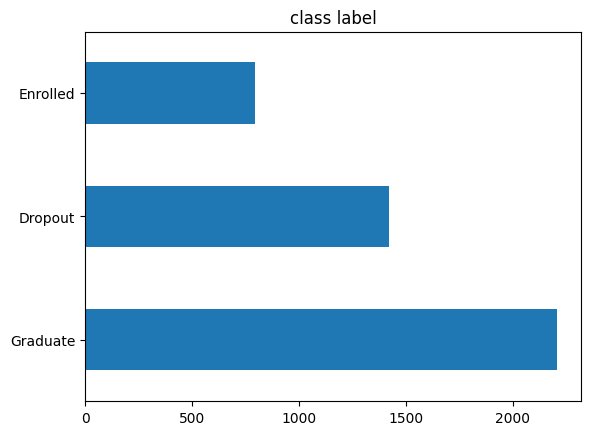

In [39]:
std['Target'].value_counts().plot(kind="barh", title="class label")

In [45]:
y = std['Target']
x = std.drop(columns=['Target'])

In [47]:
y

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object

In [49]:
x

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,15,1,1,19,1,1,10,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,12,1,1,1,22,27,10,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9,1,1,1,22,27,8,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [54]:
scaler = StandardScaler()
scaler.fit_transform(x)

array([[-0.29482875,  0.21006857,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       [-0.29482875, -0.16740639, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.11109377,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       ...,
       [-0.29482875, -1.11109377, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.11109377, -0.55406775, ..., -0.81325289,
        -1.46687097, -1.37551124],
       [-0.29482875, -0.35614386, -0.55406775, ...,  0.42569541,
         1.7879738 , -0.74987207]])

In [56]:
std = pd.DataFrame(scaler.fit_transform(x))

In [58]:
std

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.294829,0.210069,2.490896,-1.823744,0.350082,-0.386404,-0.145586,0.075111,-0.584526,-0.329669,...,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
1,-0.294829,-0.167406,-0.554068,0.254153,0.350082,-0.386404,-0.145586,-1.254495,-1.218380,-0.829997,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199
2,-0.294829,-1.111094,2.490896,-1.131112,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.670987,...,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
3,-0.294829,0.210069,0.207173,1.177663,0.350082,-0.386404,-0.145586,1.183116,0.954834,-0.329669,...,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511
4,1.356212,0.965018,-0.554068,-1.592866,-2.856470,-0.386404,-0.145586,1.072315,1.045384,0.670987,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.111094,3.252137,1.177663,0.350082,-0.386404,-0.145586,-1.254495,-1.399481,-0.329669,...,-0.199273,-0.282442,-0.105726,-0.016033,0.187165,0.467631,-0.199441,1.476924,1.137005,-1.789667
4420,-0.294829,-1.111094,0.207173,1.177663,0.350082,-0.386404,10.150427,-1.254495,-1.399481,0.670987,...,-0.199273,-0.282442,-0.105726,-0.522682,-0.808050,0.147747,-0.199441,-0.175007,-0.454253,0.889126
4421,-0.294829,-1.111094,-0.554068,0.485030,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.670987,...,-0.199273,-0.282442,0.805144,0.237291,-1.139788,0.627573,-0.199441,0.876222,-1.105222,0.347199
4422,-0.294829,-1.111094,-0.554068,-0.207602,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.170659,...,-0.199273,-0.282442,-0.561161,-0.522682,0.187165,0.339678,-0.199441,-0.813253,-1.466871,-1.375511


In [60]:
pca = PCA(n_components=20)
pca.fit_transform(std)

array([[-5.61626291, -0.19138137,  0.85445816, ..., -0.17928959,
         1.03904211,  0.34054921],
       [-0.29955148, -0.94669409,  1.93841537, ..., -0.70326659,
        -1.66443685, -1.25449504],
       [-4.0188534 ,  0.51081879, -0.1139809 , ..., -1.01249088,
         0.74627808, -1.10565223],
       ...,
       [ 0.66951581, -1.01442937, -1.94960556, ...,  0.55538255,
        -0.86982086,  0.62800644],
       [-0.56397236, -1.70191494, -1.25774773, ...,  0.12858654,
        -1.12989607, -0.63696715],
       [ 0.15215919, -0.96063761, -0.08175682, ..., -0.99741734,
        -0.81424923,  0.33721048]])

In [130]:
stc=pd.DataFrame(pca.fit_transform(std))
stc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-5.616263,-0.191382,0.854455,-0.274421,0.608152,-1.683895,-1.600935,0.507868,1.729123,0.052569,-0.197139,-0.014472,-1.226206,0.325886,0.730608,1.482624,-0.872617,-0.179954,1.038889,0.340711
1,-0.299551,-0.946694,1.938415,-0.180365,-0.900222,-0.802024,0.776276,-0.832532,-1.219981,0.147412,0.290136,-0.596647,-0.131672,-1.181381,0.476493,0.381410,-0.452958,-0.703419,-1.664490,-1.254456
2,-4.018853,0.510819,-0.113978,0.171792,2.185047,-1.929194,-2.757450,0.542685,-0.756732,-0.334630,0.018618,-0.341121,-1.156529,-0.583352,0.209660,1.365954,-0.285322,-1.011631,0.746461,-1.105860
3,0.414862,-1.073877,-0.621623,-0.650286,0.212288,1.324354,-0.475593,-0.421026,-0.451051,-0.860272,-0.818358,-0.018408,-1.430300,-1.031032,0.220539,-1.303164,0.151966,-0.208451,-0.570447,-0.274262
4,0.375114,2.699585,-2.521682,-0.320305,-1.618037,1.172549,0.369328,-0.314847,1.269901,-0.538594,0.823575,-0.471095,-0.247872,-0.249508,1.994265,-0.281765,-1.297081,0.416488,0.700351,0.509572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.151683,-1.933029,1.480886,-0.878350,-0.493646,0.908067,0.321227,1.138790,-1.664245,2.385675,0.436171,-0.208869,-1.303765,0.137886,0.121216,1.829414,-0.823266,-0.830308,1.798228,-0.463796
4420,-1.038089,-1.006613,2.452859,11.851662,-1.139700,1.379958,-1.022289,-0.573391,-2.308934,-0.471398,0.415287,-0.496721,-0.254852,0.120437,0.154680,-0.086425,-0.627688,-0.566645,-0.905183,-0.235249
4421,0.669516,-1.014428,-1.949605,0.012832,0.426487,0.432395,0.486163,0.402415,-0.054743,-1.247652,0.294234,-0.550769,-0.207379,-0.820319,-0.234148,-0.069365,0.672257,0.556574,-0.869907,0.627476
4422,-0.563972,-1.701915,-1.257746,-0.471423,0.331040,0.929759,-0.218895,0.566857,0.506158,-2.074774,-0.270372,-0.647472,0.298414,-1.106284,0.342943,-0.230945,-0.121252,0.128848,-1.129754,-0.636986


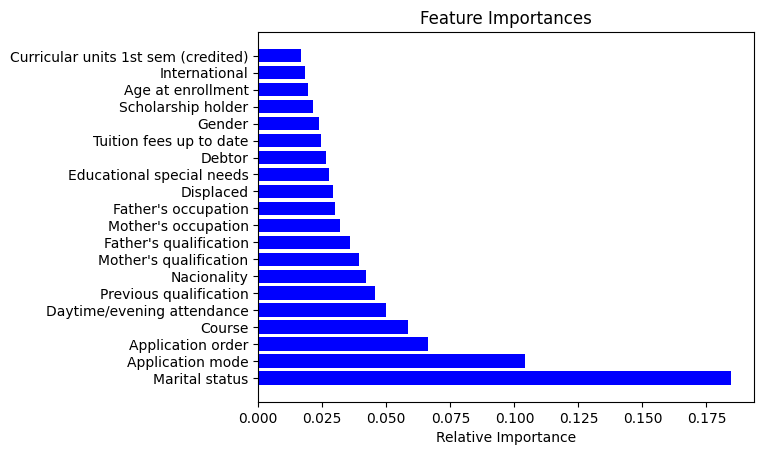

In [137]:
features = x.columns
importances = pca.explained_variance_ratio_
indices = np.argsort(importances)[-20:]
plt.title('Feature Importances')
plt.barh(range(len(indices[::-1])), importances[indices[::-1]], color='b', align='center')
plt.yticks(range(len(indices[::-1])), [features[i] for i in indices[::-1]])
plt.xlabel('Relative Importance')
plt.show()

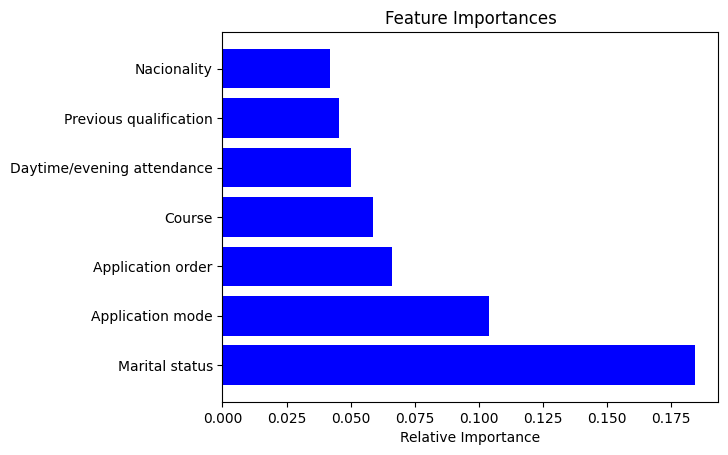

In [138]:
features = x.columns
importances = pca.explained_variance_ratio_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.barh(range(len(indices[:7])), importances[indices[:7]], color='b', align='center')
plt.yticks(range(len(indices[:7])), [features[i] for i in indices[:7]])
plt.xlabel('Relative Importance')
plt.show()

In [140]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

In [141]:
print(sorted(Counter(y_train_smote).items()))

[('Dropout', 1791), ('Enrolled', 1791), ('Graduate', 1791)]


In [142]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

In [143]:
print('shape of training set: ',X_train.shape)
print('shape of test set: ',X_test.shape)

shape of training set:  (3539, 34)
shape of test set:  (885, 34)


In [144]:
sda = neighbors.KNeighborsClassifier()

In [145]:
sda.fit(X_train, y_train)

KNeighborsClassifier()

In [146]:
y_pred = sda.predict(X_test)

In [147]:
print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 64.63276836158191


In [90]:
y_pred = sda.predict(X_test)

In [92]:
cm = confusion_matrix(y_test, y_pred)

In [149]:
print(cm)

[[197  41  78]
 [ 39  29  83]
 [ 32  40 346]]


In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.74      0.62      0.67       316
    Enrolled       0.26      0.19      0.22       151
    Graduate       0.68      0.83      0.75       418

    accuracy                           0.65       885
   macro avg       0.56      0.55      0.55       885
weighted avg       0.63      0.65      0.63       885



In [159]:
print("ac_score : ",accuracy_score(y_test, y_pred))

ac_score :  0.6463276836158192
